# 1. Install Jupyter Notebook

To work with Jupyter Notebooks, you first need to install the Jupyter package. You can do this using either pip or conda (if you have Anaconda/Miniconda installed).

**Using pip:**
```bash
pip install notebook
```

**Using conda:**
```bash
conda install -c conda-forge notebook
```


# 2. Launch Jupyter Notebook

After installing, you can launch Jupyter Notebook from your terminal or command prompt by running:

```bash
jupyter notebook
```

This will open the Jupyter Notebook interface in your default web browser.

# 3. Create a New Notebook

Once the Jupyter Notebook interface is open in your browser:

- Click on the **New** button (usually at the top right).
- Select **Python 3** (or your preferred kernel) from the dropdown menu.
- A new notebook will open in a new tab, ready for you to start coding.

# 4. Add and Execute Code Cells

- To add a new code cell, click the **+ Code** button or use the menu options.
- Write your Python code in the cell.
- To execute a cell, press **Shift + Enter** or click the **Run** button in the toolbar.

Example:


In [ ]:
# Example: Print Hello World
print("Hello, World!")

# 5. Save and Export the Notebook

- To save your notebook, click the **Save** icon or press **Ctrl + S**.
- To export your notebook, go to **File > Download as** and choose your preferred format (e.g., HTML, PDF, or Python script).

This allows you to share your work or present your results easily.

# Time Series Forecasting of OCC FOB (USD/ton)

This section covers data loading, exploration, and visualization for the OCC FOB (USD/ton) time series.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

In [2]:
# Load the data
df = pd.read_excel('Paper_TimeSeries.xlsx')
df.head()

,Months,OCC FOB (USD/ton)
0,2017-01-01,179
1,2017-02-01,202
2,2017-03-01,236
3,2017-04-01,185
4,2017-05-01,193


In [3]:
# Show info and check for missing values
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Months             98 non-null     datetime64[ns]
 1   OCC FOB (USD/ton)  98 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.7 KB


Months               0
OCC FOB (USD/ton)    0
dtype: int64

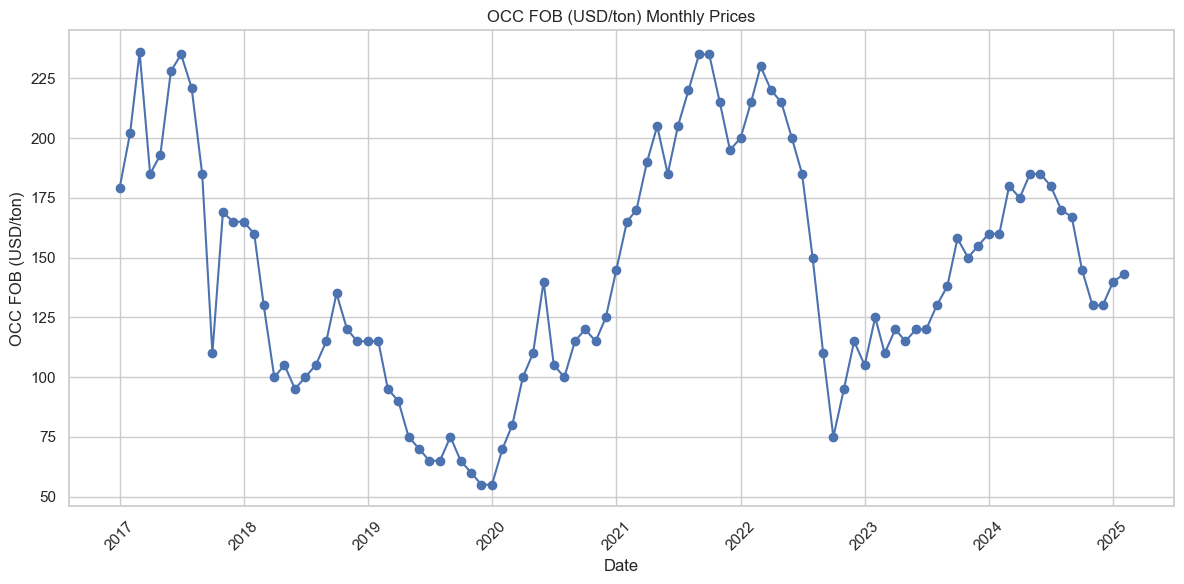

In [4]:
# Plot the time series
plt.figure(figsize=(12,6))
plt.plot(df.iloc[:,0], df.iloc[:,1], marker='o')
plt.title('OCC FOB (USD/ton) Monthly Prices')
plt.xlabel('Date')
plt.ylabel('OCC FOB (USD/ton)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [5]:
# Ensure the date column is datetime and set as index
df.columns = ['Date', 'OCC_FOB_USD_ton']
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
df = df.sort_index()
df.head()

,OCC_FOB_USD_ton
Date,
2017-01-01,179
2017-02-01,202
2017-03-01,236
2017-04-01,185
2017-05-01,193


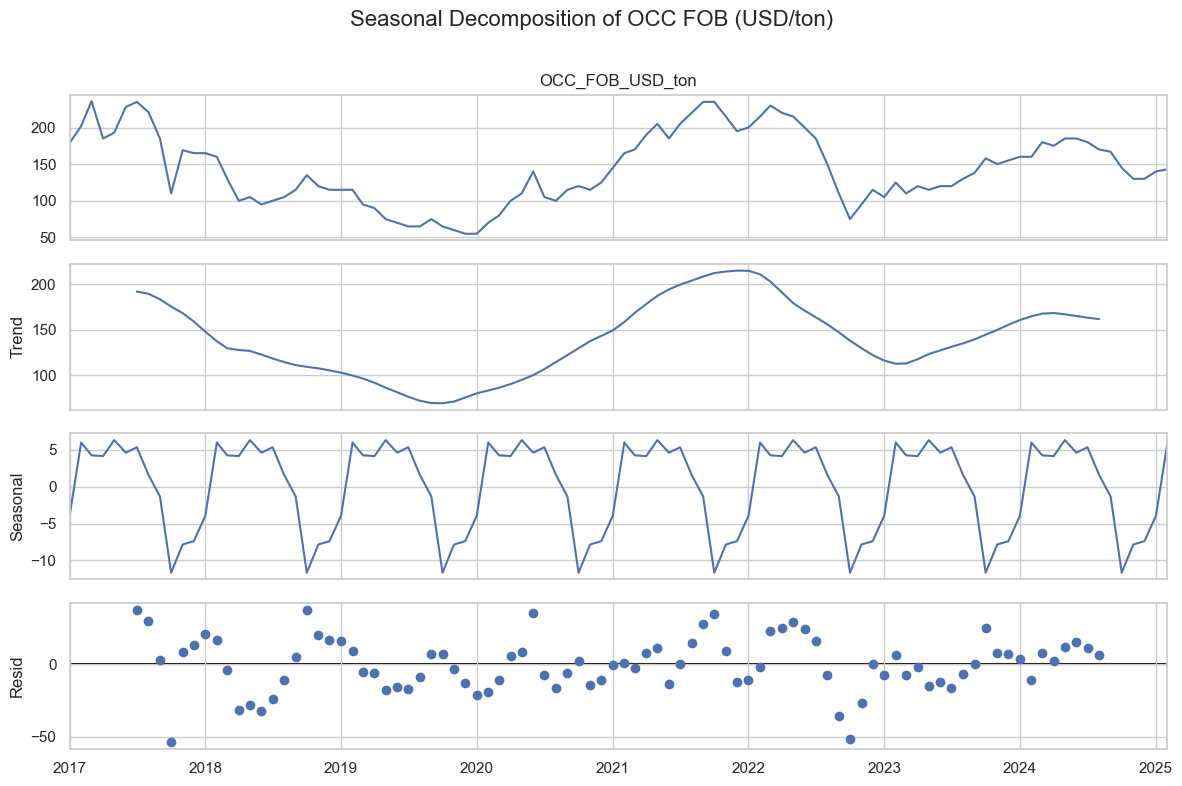

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposition = seasonal_decompose(df['OCC_FOB_USD_ton'], model='additive', period=12)
fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.suptitle('Seasonal Decomposition of OCC FOB (USD/ton)', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

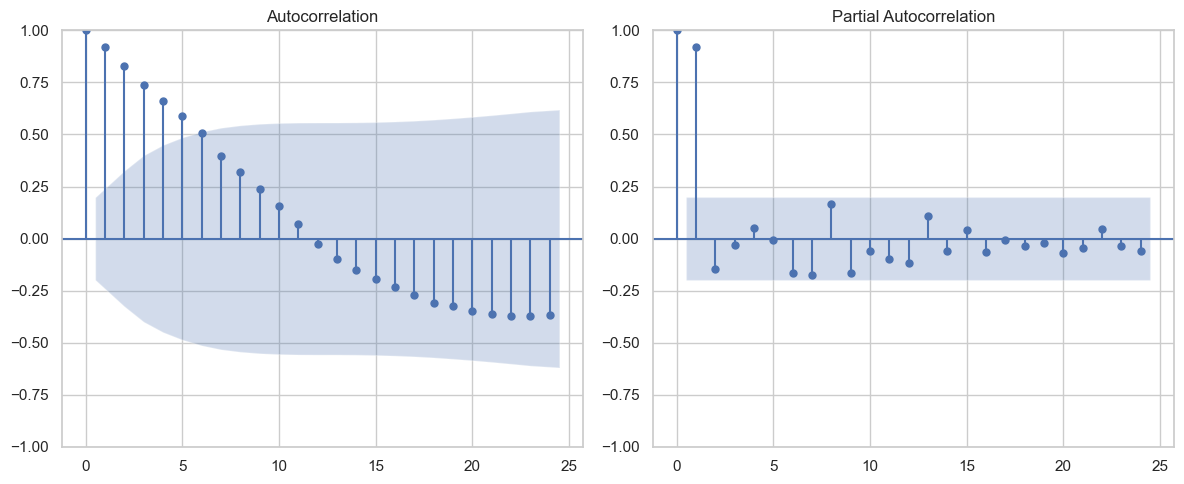

In [7]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plot_acf(df['OCC_FOB_USD_ton'], lags=24, ax=plt.gca())
plt.title('Autocorrelation')
plt.subplot(1,2,2)
plot_pacf(df['OCC_FOB_USD_ton'], lags=24, ax=plt.gca(), method='ywm')
plt.title('Partial Autocorrelation')
plt.tight_layout()
plt.show()

In [8]:
from statsmodels.tsa.stattools import adfuller

# Augmented Dickey-Fuller test
result = adfuller(df['OCC_FOB_USD_ton'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
for key, value in result[4].items():
    print(f'Critical Value {key}: {value}')
if result[1] < 0.05:
    print('The series is likely stationary.')
else:
    print('The series is likely non-stationary.')

ADF Statistic: -2.3087524195789104
p-value: 0.16916067870968204
Critical Value 1%: -3.5003788874873405
Critical Value 5%: -2.8921519665075235
Critical Value 10%: -2.5830997960069446
The series is likely non-stationary.


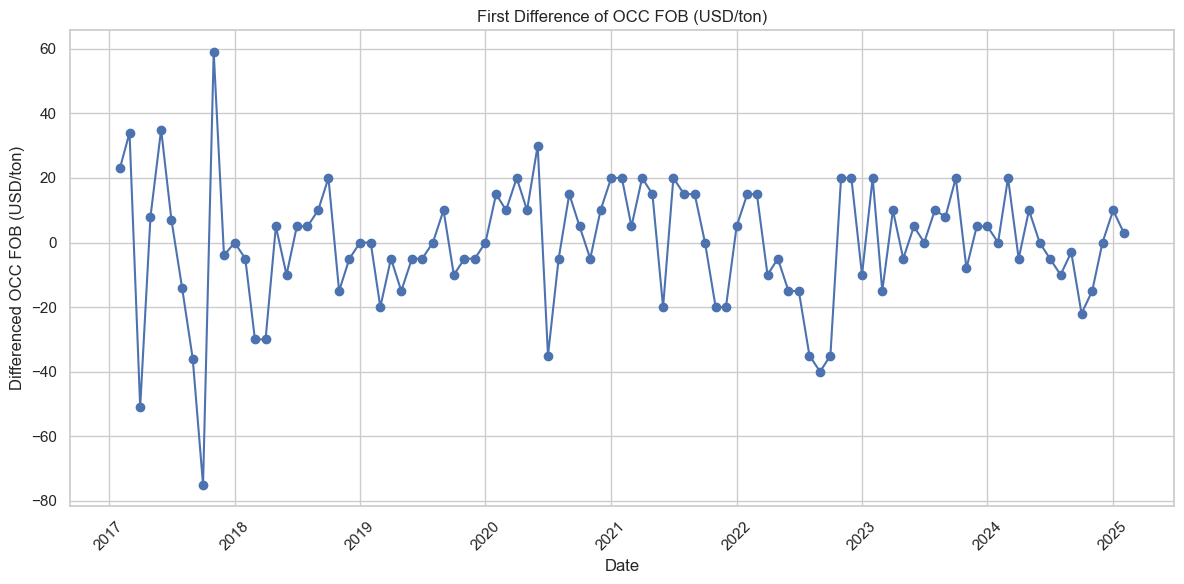

Date
2017-02-01    23.0
2017-03-01    34.0
2017-04-01   -51.0
2017-05-01     8.0
2017-06-01    35.0
Name: OCC_FOB_diff, dtype: float64

In [9]:
# Apply first differencing to make the series stationary
df['OCC_FOB_diff'] = df['OCC_FOB_USD_ton'].diff()
plt.figure(figsize=(12,6))
plt.plot(df.index, df['OCC_FOB_diff'], marker='o')
plt.title('First Difference of OCC FOB (USD/ton)')
plt.xlabel('Date')
plt.ylabel('Differenced OCC FOB (USD/ton)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
df['OCC_FOB_diff'].dropna().head()

In [10]:
# Re-run ADF test on differenced series
result_diff = adfuller(df['OCC_FOB_diff'].dropna())
print('ADF Statistic (Differenced):', result_diff[0])
print('p-value:', result_diff[1])
for key, value in result_diff[4].items():
    print(f'Critical Value {key}: {value}')
if result_diff[1] < 0.05:
    print('The differenced series is likely stationary.')
else:
    print('The differenced series is still non-stationary.')

ADF Statistic (Differenced): -9.023329120508691
p-value: 5.6971424132406135e-15
Critical Value 1%: -3.5003788874873405
Critical Value 5%: -2.8921519665075235
Critical Value 10%: -2.5830997960069446
The differenced series is likely stationary.


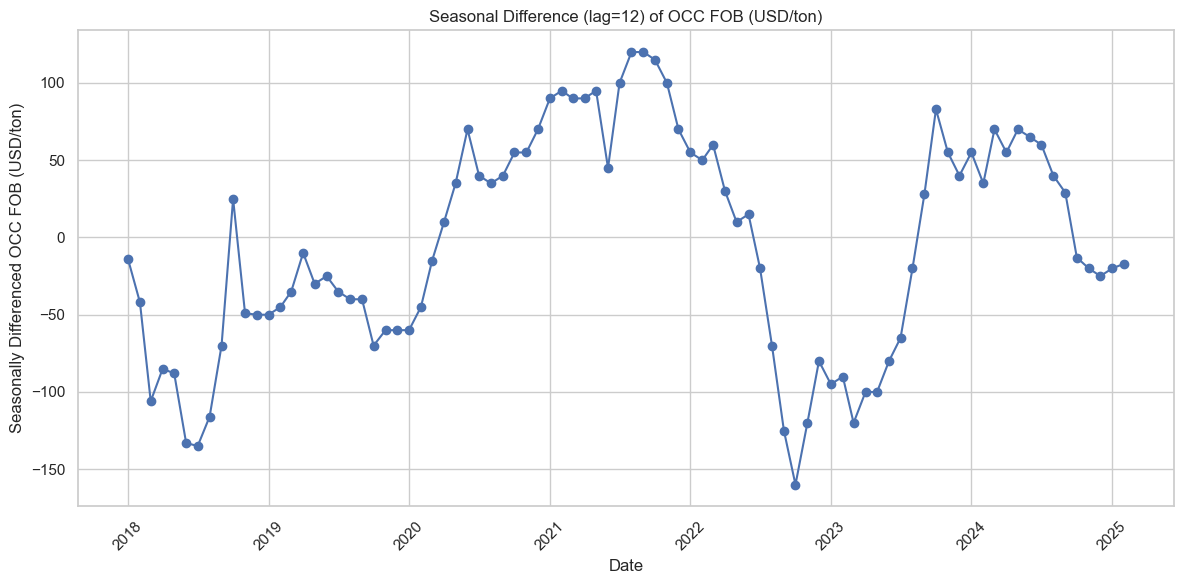

ADF Statistic (Seasonal Differenced): -1.861826373043967
p-value: 0.3502266595336558
Critical Value 1%: -3.5232835753964475
Critical Value 5%: -2.902030597326081
Critical Value 10%: -2.5883710883843123
The seasonal differenced series is still non-stationary.


In [11]:
# If first differencing is not enough, try seasonal differencing
seasonal_diff = df['OCC_FOB_USD_ton'].diff(12)
plt.figure(figsize=(12,6))
plt.plot(df.index, seasonal_diff, marker='o')
plt.title('Seasonal Difference (lag=12) of OCC FOB (USD/ton)')
plt.xlabel('Date')
plt.ylabel('Seasonally Differenced OCC FOB (USD/ton)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ADF test on seasonal differenced series
from statsmodels.tsa.stattools import adfuller
result_seasonal = adfuller(seasonal_diff.dropna())
print('ADF Statistic (Seasonal Differenced):', result_seasonal[0])
print('p-value:', result_seasonal[1])
for key, value in result_seasonal[4].items():
    print(f'Critical Value {key}: {value}')
if result_seasonal[1] < 0.05:
    print('The seasonal differenced series is likely stationary.')
else:
    print('The seasonal differenced series is still non-stationary.')

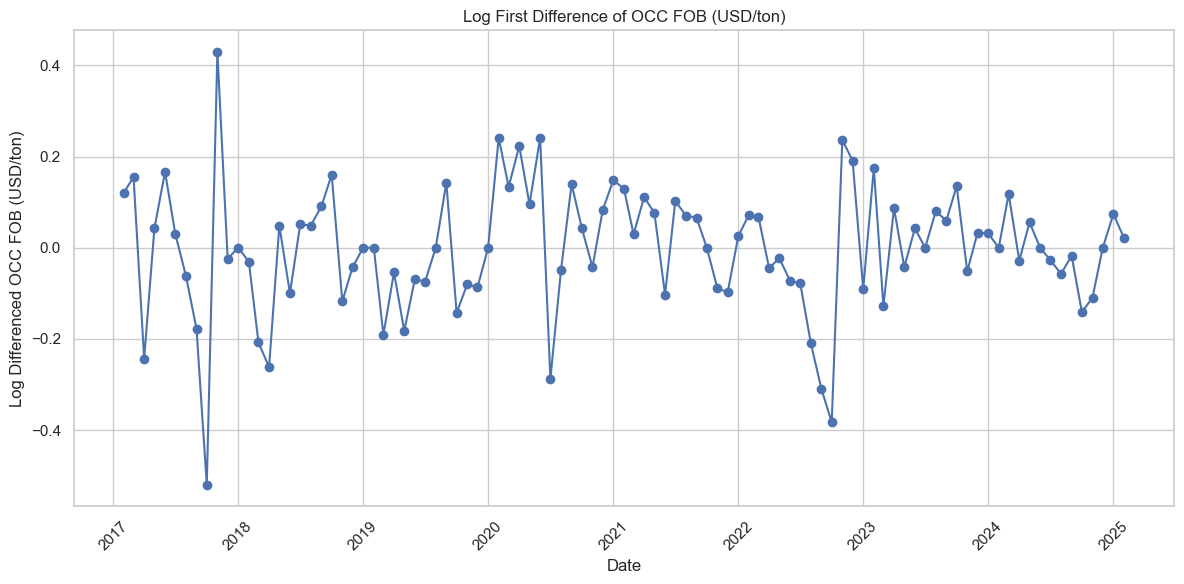

ADF Statistic (Log Differenced): -9.044879050888687
p-value: 5.018013397239723e-15
Critical Value 1%: -3.5003788874873405
Critical Value 5%: -2.8921519665075235
Critical Value 10%: -2.5830997960069446
The log differenced series is likely stationary.


In [12]:
# If variance is not stable, try log transformation and differencing
log_series = np.log(df['OCC_FOB_USD_ton'])
log_diff = log_series.diff().dropna()
plt.figure(figsize=(12,6))
plt.plot(df.index[1:], log_diff, marker='o')
plt.title('Log First Difference of OCC FOB (USD/ton)')
plt.xlabel('Date')
plt.ylabel('Log Differenced OCC FOB (USD/ton)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ADF test on log differenced series
result_log_diff = adfuller(log_diff)
print('ADF Statistic (Log Differenced):', result_log_diff[0])
print('p-value:', result_log_diff[1])
for key, value in result_log_diff[4].items():
    print(f'Critical Value {key}: {value}')
if result_log_diff[1] < 0.05:
    print('The log differenced series is likely stationary.')
else:
    print('The log differenced series is still non-stationary.')

In [13]:
# Train/test split on log-transformed series
log_series = np.log(df['OCC_FOB_USD_ton'])
train_size = int(len(log_series) * 0.85)
train, test = log_series.iloc[:train_size], log_series.iloc[train_size:]
print(f"Train size: {len(train)} | Test size: {len(test)}")
train.tail(), test.head()

Train size: 83 | Test size: 15


(Date
 2023-07-01    4.787492
 2023-08-01    4.867534
 2023-09-01    4.927254
 2023-10-01    5.062595
 2023-11-01    5.010635
 Name: OCC_FOB_USD_ton, dtype: float64,
 Date
 2023-12-01    5.043425
 2024-01-01    5.075174
 2024-02-01    5.075174
 2024-03-01    5.192957
 2024-04-01    5.164786
 Name: OCC_FOB_USD_ton, dtype: float64)

In [14]:
# Function to invert log transformation
def invert_log_transform(log_preds):
    return np.exp(log_preds)

# Example usage:
# original_preds = invert_log_transform(log_preds)

## Next Steps: Model Selection and Training

- Fit and compare the following models:
    - Prophet (with log-transformed data)
    - XGBoost (with lag features)
    - LSTM (if needed, but consider model size for deployment)
- Evaluate each model using RMSE, MAE, and diagnostic plots
- Select the best model for forecasting and deployment

In [15]:
# Install Prophet and XGBoost if not already installed
import sys
!{sys.executable} -m pip install prophet xgboost openpyxl --quiet

19:32:49 - cmdstanpy - INFO - Chain [1] start processing
19:32:50 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\rudra.s\AppData\Local\anaconda4\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Prophet RMSE: 63.36
Prophet MAE: 62.00


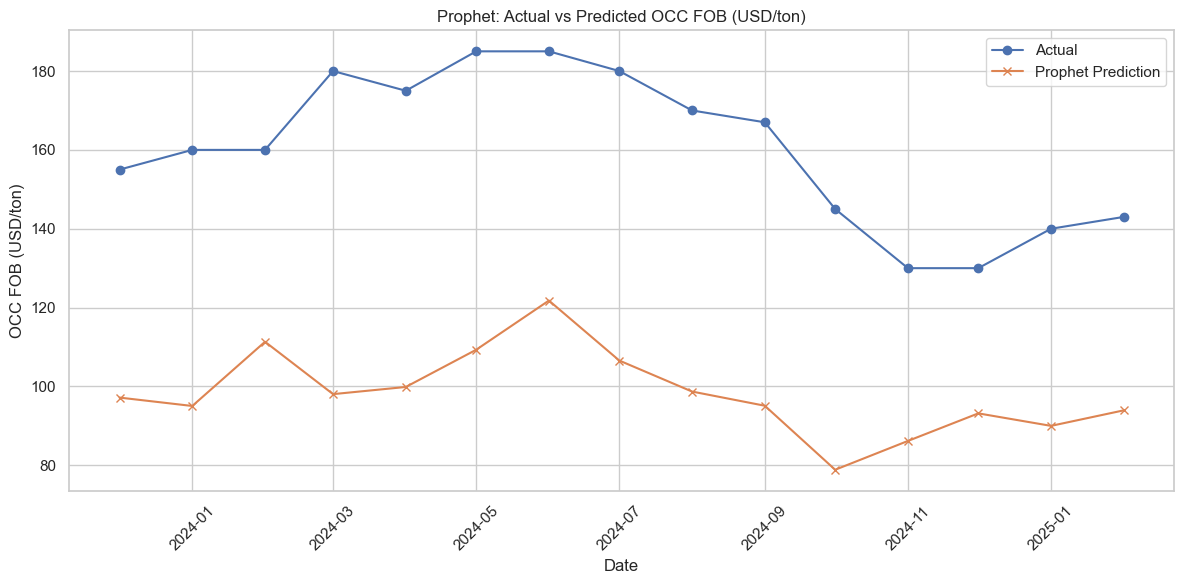

In [16]:
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Prepare data for Prophet (requires columns 'ds' and 'y')
prophet_train = train.reset_index().rename(columns={"Date": "ds", "OCC_FOB_USD_ton": "y"})
prophet_train['y'] = train.values
prophet_test = test.reset_index().rename(columns={"Date": "ds", "OCC_FOB_USD_ton": "y"})
prophet_test['y'] = test.values

# Fit Prophet model
m = Prophet(yearly_seasonality=True, daily_seasonality=False, weekly_seasonality=False)
m.fit(prophet_train)

# Forecast on test set
df_future = prophet_test[['ds']].copy()
forecast = m.predict(df_future)

# Inverse log transform
y_pred_prophet = invert_log_transform(forecast['yhat'].values)
y_true_prophet = invert_log_transform(prophet_test['y'].values)

# Evaluation
rmse_prophet = mean_squared_error(y_true_prophet, y_pred_prophet, squared=False)
mae_prophet = mean_absolute_error(y_true_prophet, y_pred_prophet)
print(f"Prophet RMSE: {rmse_prophet:.2f}")
print(f"Prophet MAE: {mae_prophet:.2f}")

# Plot actual vs predicted
plt.figure(figsize=(12,6))
plt.plot(prophet_test['ds'], y_true_prophet, label='Actual', marker='o')
plt.plot(prophet_test['ds'], y_pred_prophet, label='Prophet Prediction', marker='x')
plt.title('Prophet: Actual vs Predicted OCC FOB (USD/ton)')
plt.xlabel('Date')
plt.ylabel('OCC FOB (USD/ton)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

c:\Users\rudra.s\AppData\Local\anaconda4\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


XGBoost RMSE: 15.20
XGBoost MAE: 14.42


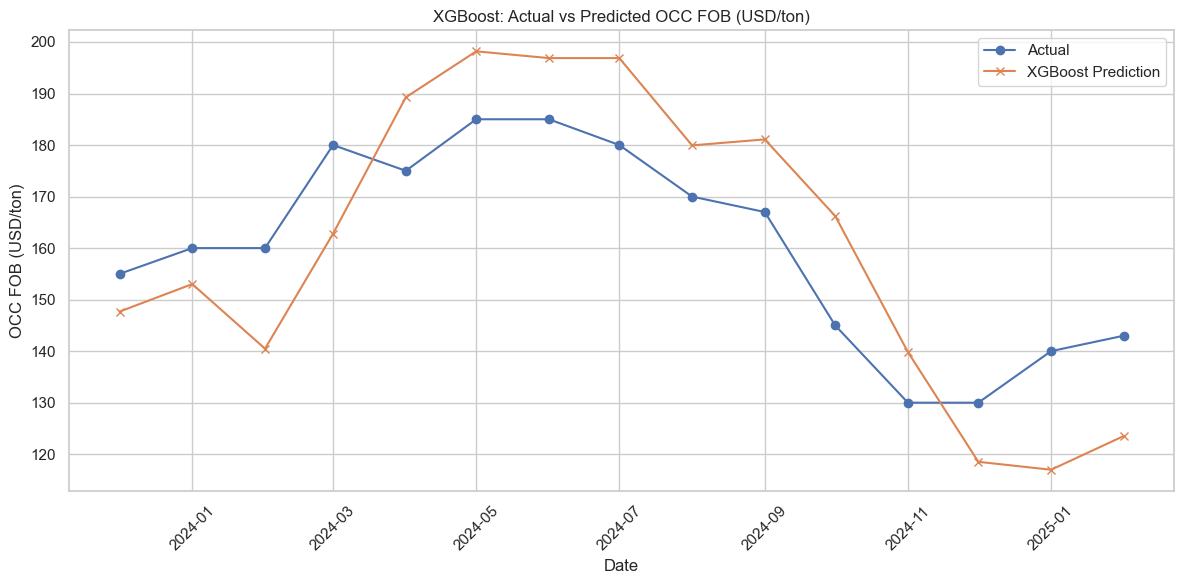

In [17]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Feature engineering for XGBoost (lag features)
def create_lag_features(series, lags=[1, 12]):
    df_feat = pd.DataFrame({'y': series})
    for lag in lags:
        df_feat[f'lag_{lag}'] = series.shift(lag)
    df_feat = df_feat.dropna()
    return df_feat

lags = [1, 12]
xgb_data = create_lag_features(log_series, lags)

# Split into train/test
xgb_train = xgb_data.iloc[:train_size-lags[-1]]
xgb_test = xgb_data.iloc[train_size-lags[-1]:]

X_train = xgb_train.drop('y', axis=1)
y_train = xgb_train['y']
X_test = xgb_test.drop('y', axis=1)
y_test = xgb_test['y']

# Fit XGBoost
model_xgb = xgb.XGBRegressor(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
model_xgb.fit(X_train, y_train)

# Predict and inverse log transform
y_pred_xgb = invert_log_transform(model_xgb.predict(X_test))
y_true_xgb = invert_log_transform(y_test)

# Evaluation
rmse_xgb = mean_squared_error(y_true_xgb, y_pred_xgb, squared=False)
mae_xgb = mean_absolute_error(y_true_xgb, y_pred_xgb)
print(f"XGBoost RMSE: {rmse_xgb:.2f}")
print(f"XGBoost MAE: {mae_xgb:.2f}")

# Plot actual vs predicted
plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_true_xgb, label='Actual', marker='o')
plt.plot(y_test.index, y_pred_xgb, label='XGBoost Prediction', marker='x')
plt.title('XGBoost: Actual vs Predicted OCC FOB (USD/ton)')
plt.xlabel('Date')
plt.ylabel('OCC FOB (USD/ton)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Model Selection: XGBoost Chosen

Based on the evaluation metrics (RMSE: 15.20, MAE: 14.42), XGBoost provides the best results. We will use XGBoost for final forecasting, diagnostics, and deployment.

**Next steps:**
- Forecast the next 6 months
- Export actual vs predicted and forecast results to Excel
- Prepare for deployment (web app, GitHub, Heroku)
- Save model and update logic for new data input

In [18]:
# Forecast next 6 months using XGBoost
from pandas.tseries.offsets import DateOffset

# Prepare last known lags for forecasting
def forecast_xgboost(model, last_values, periods=6, lags=[1,12]):
    preds = []
    last_vals = list(last_values)
    for i in range(periods):
        features = [last_vals[-lag] for lag in lags]
        pred_log = model.predict(np.array(features).reshape(1, -1))[0]
        pred = invert_log_transform(pred_log)
        preds.append(pred)
        last_vals.append(pred_log)  # append log value for next lag
    return preds

# Get last lags from log_series
last_logs = list(log_series[-max(lags):])
future_preds = forecast_xgboost(model_xgb, last_logs, periods=6, lags=lags)

# Prepare forecast dates
last_date = df.index[-1]
forecast_dates = [last_date + DateOffset(months=i+1) for i in range(6)]

# Create DataFrame for forecast
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecast_OCC_FOB_USD_ton': future_preds})
forecast_df.set_index('Date', inplace=True)
forecast_df

,Forecast_OCC_FOB_USD_ton
Date,
2025-03-01,123.179947
2025-04-01,118.107353
2025-05-01,113.575043
2025-06-01,114.249283
2025-07-01,114.808411
2025-08-01,115.138710


In [19]:
# Export actual vs predicted and forecast to Excel
results_df = pd.DataFrame({
    'Date': y_test.index,
    'Actual_OCC_FOB_USD_ton': y_true_xgb,
    'Predicted_OCC_FOB_USD_ton': y_pred_xgb
}).set_index('Date')

with pd.ExcelWriter('OCC_FOB_Results.xlsx', engine='openpyxl') as writer:
    results_df.to_excel(writer, sheet_name='Actual_vs_Predicted')
    forecast_df.to_excel(writer, sheet_name='Forecast_Next6Months')

print('Results exported to OCC_FOB_Results.xlsx')

Results exported to OCC_FOB_Results.xlsx


In [ ]:
import joblib
# Save the trained XGBoost model
joblib.dump(model_xgb, 'xgboost_occ_fob_model.pkl')
print('Model saved as xgboost_occ_fob_model.pkl')